# Load in your csv.gz's of results for each year extracted 

In [2]:
import json
import os, time,json
import tmdbsimple as tmdb
import pandas as pd
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt

In [3]:
movies_2000 = pd.read_csv('C:/Users/Shaun/Documents/GitHub/Data_Enrichment/Data/final_tmdb_data_2000.csv.gz')
movies_2001 = pd.read_csv('C:/Users/Shaun/Documents/GitHub/Data_Enrichment/Data/final_tmdb_data_2001.csv.gz')
# Concatenate the DataFrames
all_movies = pd.concat([movies_2000, movies_2001], ignore_index=True)

In [4]:
all_movies.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.00,3.0,NaN


In [5]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                4586 non-null   object 
 1   adult                  4584 non-null   float64
 2   backdrop_path          2164 non-null   object 
 3   belongs_to_collection  265 non-null    object 
 4   budget                 4584 non-null   float64
 5   genres                 4584 non-null   object 
 6   homepage               228 non-null    object 
 7   id                     4584 non-null   float64
 8   original_language      4584 non-null   object 
 9   original_title         4584 non-null   object 
 10  overview               4245 non-null   object 
 11  popularity             4584 non-null   float64
 12  poster_path            3994 non-null   object 
 13  production_companies   4584 non-null   object 
 14  production_countries   4584 non-null   object 
 15  rele

# How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

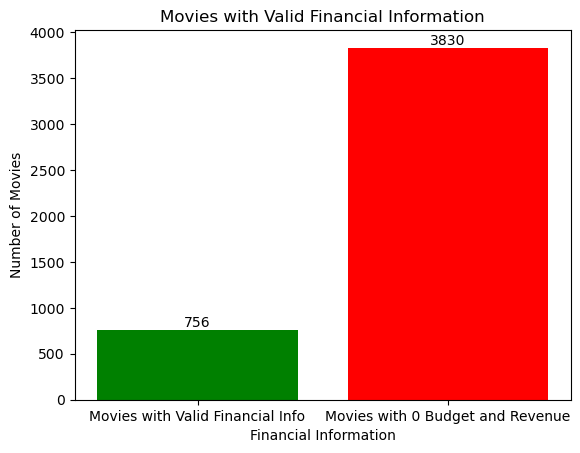

In [7]:
filtered_movies = all_movies[(all_movies['budget'] > 0) | (all_movies['revenue'] > 0)]

# Count of movies with valid financial information
valid_financial_info_count = len(filtered_movies)

# Count of movies with 0 values for both budget and revenue
invalid_financial_info_count = len(all_movies) - valid_financial_info_count

# Data for visualization
labels = ['Movies with Valid Financial Info', 'Movies with 0 Budget and Revenue']
counts = [valid_financial_info_count, invalid_financial_info_count]

# Create bar chart with annotations
fig, ax = plt.subplots()
bars = ax.bar(labels, counts, color=['green', 'red'])

# Add actual numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom')

plt.xlabel('Financial Information')
plt.ylabel('Number of Movies')
plt.title('Movies with Valid Financial Information')
plt.show()

# How many movies are there in each of the certification categories (G/PG/PG-13/R)?

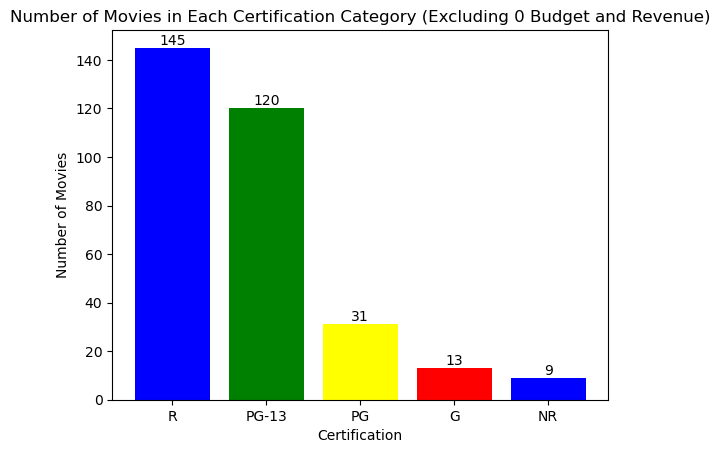

In [8]:
# Filter out movies with 0 values for both budget and revenue
valid_movies = all_movies[(all_movies['budget'] > 0) & (all_movies['revenue'] > 0)]

# Count of movies in each certification category
certification_counts = valid_movies['certification'].value_counts()

# Data for visualization
certifications = certification_counts.index
counts = certification_counts.values

# Create bar chart with annotations
fig, ax = plt.subplots()
bars = ax.bar(certifications, counts, color=['blue', 'green', 'yellow', 'red'])

# Add actual numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom')

plt.xlabel('Certification')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Certification Category (Excluding 0 Budget and Revenue)')
plt.show()

# What is the average revenue per certification category?